# ML Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

- The attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. The actual gender and predicted gender of each customer is also provided.
- Complete each of the following activities in a jupyter notebook or similar. Put your name and email at the top of the notebook and include your name in the notebook file name. Send back only your notebook file and please do not zip it.
- A) Assemble a dataframe with one row per customer and the following columns:
  * customer_id
  * gender
  * most_recent_order_date
  * order_count (number of orders placed by this customer) <br> 
   *  Sort the dataframe by order_count decending and display.
   *  Sort the dataframe by customer_id ascending and display.
   
- B) Plot the count of orders per week.

- C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

- D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. What does the confusion matrix tell you about the quality of the predictions?

## Data import

In [2]:
df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2])
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


- Due to many duplicates of customer_id, we need another index. 
- cf) df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2], index_col=[0])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       13471 non-null  int64         
 1   gender            13471 non-null  int64         
 2   date              13471 non-null  datetime64[ns]
 3   value             13471 non-null  float64       
 4   predicted_gender  13471 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 526.3 KB


## Groupby and transform

In [4]:
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


- order count

In [5]:
df.groupby(by = "customer_id", group_keys= True).value.transform("count")

0        1
1        1
2        3
3        4
4        1
        ..
13466    1
13467    1
13468    1
13469    1
13470    2
Name: value, Length: 13471, dtype: int64

In [6]:
df["order_count"] = df.groupby(by = "customer_id", group_keys= True).value.transform("count")
df

,customer_id,gender,date,value,predicted_gender,order_count
0,1000,0,2017-01-01 00:11:31,198.50,1,1
1,1001,0,2017-01-01 00:29:56,338.00,1,1
2,1002,1,2017-01-01 01:30:31,733.00,1,3
3,1003,1,2017-01-01 01:34:22,772.00,1,4
4,1004,0,2017-01-01 03:11:54,508.00,1,1
...,...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0,1
13467,9811,1,2017-12-31 22:24:06,148.60,0,1
13468,9812,0,2017-12-31 23:01:10,153.00,1,1
13469,9813,0,2017-12-31 23:11:02,534.00,1,1


In [7]:
#loyal customers
df.loc[df.order_count > 10]

,customer_id,gender,date,value,predicted_gender,order_count
195,1186,0,2017-01-09 01:08:06,550.0,1,12
228,1219,1,2017-01-10 02:58:30,202.0,1,11
277,1266,1,2017-01-11 01:16:22,237.0,0,12
429,1186,0,2017-01-14 22:21:17,494.0,1,12
737,1668,1,2017-01-20 22:01:13,258.0,1,16
...,...,...,...,...,...,...
12924,7419,1,2017-12-15 15:34:56,101.0,1,25
12946,4487,0,2017-12-15 22:45:15,113.0,1,11
13021,3170,0,2017-12-18 02:09:44,108.0,1,12
13357,3170,0,2017-12-28 19:41:09,120.6,1,12


## Duplicates

In [8]:
df[df.duplicated()]

,customer_id,gender,date,value,predicted_gender,order_count
9961,7401,0,2017-09-21 22:58:02,1336.00,0,6
10775,8056,1,2017-10-10 03:35:53,462.57,1,2


In [9]:
df[df.duplicated(keep = False)] #real possibilities of duplicates given the dates

,customer_id,gender,date,value,predicted_gender,order_count
9960,7401,0,2017-09-21 22:58:02,1336.00,0,6
9961,7401,0,2017-09-21 22:58:02,1336.00,0,6
10774,8056,1,2017-10-10 03:35:53,462.57,1,2
10775,8056,1,2017-10-10 03:35:53,462.57,1,2


In [10]:
df.drop(index = [9961, 10775], inplace = True) 

- alphabet[alphabet.duplicated(keep = False)] from NB_11_Cleaning Data

In [11]:
df = df.sort_values("customer_id", ascending = True).reset_index(drop = True)
df

,customer_id,gender,date,value,predicted_gender,order_count
0,1000,0,2017-01-01 00:11:31,198.50,1,1
1,1001,0,2017-01-01 00:29:56,338.00,1,1
2,1002,1,2017-02-19 21:35:31,176.00,1,3
3,1002,1,2017-01-23 04:33:38,148.60,1,3
4,1002,1,2017-01-01 01:30:31,733.00,1,3
...,...,...,...,...,...,...
13464,9809,1,2017-12-31 21:39:33,606.40,1,1
13465,9810,1,2017-12-31 22:16:20,794.44,0,1
13466,9811,1,2017-12-31 22:24:06,148.60,0,1
13467,9812,0,2017-12-31 23:01:10,153.00,1,1


## Date - most recent

###  Sort the dataframe by customer_id ascending and display. 

In [12]:
df.set_index("customer_id", drop = True, inplace = True)
df

,gender,date,value,predicted_gender,order_count
customer_id,,,,,
1000,0,2017-01-01 00:11:31,198.50,1,1
1001,0,2017-01-01 00:29:56,338.00,1,1
1002,1,2017-02-19 21:35:31,176.00,1,3
1002,1,2017-01-23 04:33:38,148.60,1,3
1002,1,2017-01-01 01:30:31,733.00,1,3
...,...,...,...,...,...
9809,1,2017-12-31 21:39:33,606.40,1,1
9810,1,2017-12-31 22:16:20,794.44,0,1
9811,1,2017-12-31 22:24:06,148.60,0,1


In [13]:
#looking for most recent order
df["most_recent_order_date"] = df.groupby("customer_id")["date"].max()

In [14]:
df.head(50)

,gender,date,value,predicted_gender,order_count,most_recent_order_date
customer_id,,,,,,
1000,0,2017-01-01 00:11:31,198.50,1,1,2017-01-01 00:11:31
1001,0,2017-01-01 00:29:56,338.00,1,1,2017-01-01 00:29:56
1002,1,2017-02-19 21:35:31,176.00,1,3,2017-02-19 21:35:31
1002,1,2017-01-23 04:33:38,148.60,1,3,2017-02-19 21:35:31
1002,1,2017-01-01 01:30:31,733.00,1,3,2017-02-19 21:35:31
1003,1,2017-04-26 02:37:20,704.00,1,4,2017-04-26 02:37:20
1003,1,2017-04-25 09:54:54,0.00,1,4,2017-04-26 02:37:20
1003,1,2017-01-01 01:34:22,772.00,1,4,2017-04-26 02:37:20
1003,1,2017-01-20 05:56:10,425.50,1,4,2017-04-26 02:37:20


###    Sort the dataframe by order_count decending and display.

In [15]:
df.sort_values(by = ["order_count"], ascending = False, inplace= False).head(60)

,gender,date,value,predicted_gender,order_count,most_recent_order_date
customer_id,,,,,,
7419,1,2017-09-14 21:47:32,376.71,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 01:24:34,324.45,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 21:16:56,186.00,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 01:36:05,313.56,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 21:32:28,338.00,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 21:41:37,351.67,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 22:03:33,98.00,1,25,2017-12-15 15:34:56
7419,1,2017-10-04 22:25:07,340.78,1,25,2017-12-15 15:34:56
7419,1,2017-09-14 22:07:48,340.78,1,25,2017-12-15 15:34:56


## Plot

In [16]:
df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2])
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13466,9810,1,2017-12-31 22:16:20,794.44,0
13467,9811,1,2017-12-31 22:24:06,148.60,0
13468,9812,0,2017-12-31 23:01:10,153.00,1
13469,9813,0,2017-12-31 23:11:02,534.00,1


In [17]:
df.drop_duplicates(ignore_index= True) #new index

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13464,9810,1,2017-12-31 22:16:20,794.44,0
13465,9811,1,2017-12-31 22:24:06,148.60,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [18]:
df.set_index("date", drop = True, inplace = True)
df

,customer_id,gender,value,predicted_gender
date,,,,
2017-01-01 00:11:31,1000,0,198.50,1
2017-01-01 00:29:56,1001,0,338.00,1
2017-01-01 01:30:31,1002,1,733.00,1
2017-01-01 01:34:22,1003,1,772.00,1
2017-01-01 03:11:54,1004,0,508.00,1
...,...,...,...,...
2017-12-31 22:16:20,9810,1,794.44,0
2017-12-31 22:24:06,9811,1,148.60,0
2017-12-31 23:01:10,9812,0,153.00,1


In [19]:
import datetime

In [20]:
df.index.isocalendar().week

date
2017-01-01 00:11:31    52
2017-01-01 00:29:56    52
2017-01-01 01:30:31    52
2017-01-01 01:34:22    52
2017-01-01 03:11:54    52
                       ..
2017-12-31 22:16:20    52
2017-12-31 22:24:06    52
2017-12-31 23:01:10    52
2017-12-31 23:11:02    52
2017-12-31 23:35:09    52
Name: week, Length: 13471, dtype: UInt32

- count of orders per week

In [21]:
df2 = df.loc[:, ["value"]]
df2

,value
date,
2017-01-01 00:11:31,198.50
2017-01-01 00:29:56,338.00
2017-01-01 01:30:31,733.00
2017-01-01 01:34:22,772.00
2017-01-01 03:11:54,508.00
...,...
2017-12-31 22:16:20,794.44
2017-12-31 22:24:06,148.60
2017-12-31 23:01:10,153.00


In [22]:
df2["week_no"] = df.index.isocalendar().week
df2

,value,week_no
date,,
2017-01-01 00:11:31,198.50,52
2017-01-01 00:29:56,338.00,52
2017-01-01 01:30:31,733.00,52
2017-01-01 01:34:22,772.00,52
2017-01-01 03:11:54,508.00,52
...,...,...
2017-12-31 22:16:20,794.44,52
2017-12-31 22:24:06,148.60,52
2017-12-31 23:01:10,153.00,52


In [23]:
#count of each week's order
df3 = df2.groupby("week_no").count().reset_index(drop = False)
df3

,week_no,value
0,1,180
1,2,264
2,3,405
3,4,233
4,5,211
5,6,195
6,7,248
7,8,315
8,9,260
9,10,318


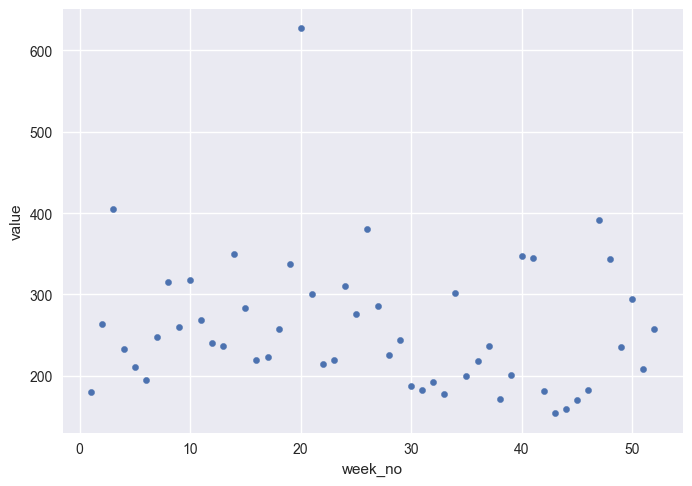

In [24]:
df3.plot.scatter(x="week_no", y="value")
plt.show()

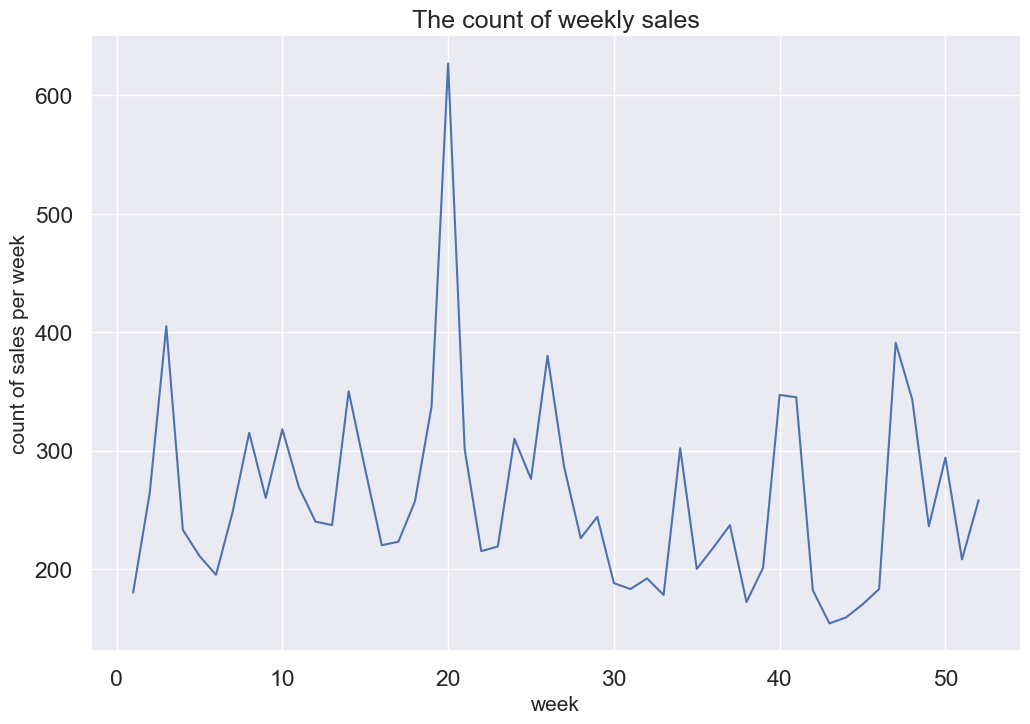

In [25]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.lineplot(data = df3, x = "week_no", y = "value")
plt.title("The count of weekly sales", fontsize = 18)
plt.xlabel("week", fontsize = 15)
plt.ylabel("count of sales per week", fontsize = 15)
plt.show()

- Summed value of orders per month

In [26]:
import calendar

In [27]:
df_m = df.loc[:, ["value"]]
df_m

,value
date,
2017-01-01 00:11:31,198.50
2017-01-01 00:29:56,338.00
2017-01-01 01:30:31,733.00
2017-01-01 01:34:22,772.00
2017-01-01 03:11:54,508.00
...,...
2017-12-31 22:16:20,794.44
2017-12-31 22:24:06,148.60
2017-12-31 23:01:10,153.00


In [28]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=13471)

In [29]:
df_m["month"] = df.index.month
df_m

,value,month
date,,
2017-01-01 00:11:31,198.50,1
2017-01-01 00:29:56,338.00,1
2017-01-01 01:30:31,733.00,1
2017-01-01 01:34:22,772.00,1
2017-01-01 03:11:54,508.00,1
...,...,...
2017-12-31 22:16:20,794.44,12
2017-12-31 22:24:06,148.60,12
2017-12-31 23:01:10,153.00,12


In [30]:
df_m_GB = df_m.groupby("month").sum().reset_index(drop = False)
df_m_GB

,month,value
0,1,369084.36
1,2,291354.06
2,3,409505.06
3,4,394895.64
4,5,497612.00
5,6,395155.31
6,7,324662.29
7,8,320410.95
8,9,424093.33
9,10,502969.97


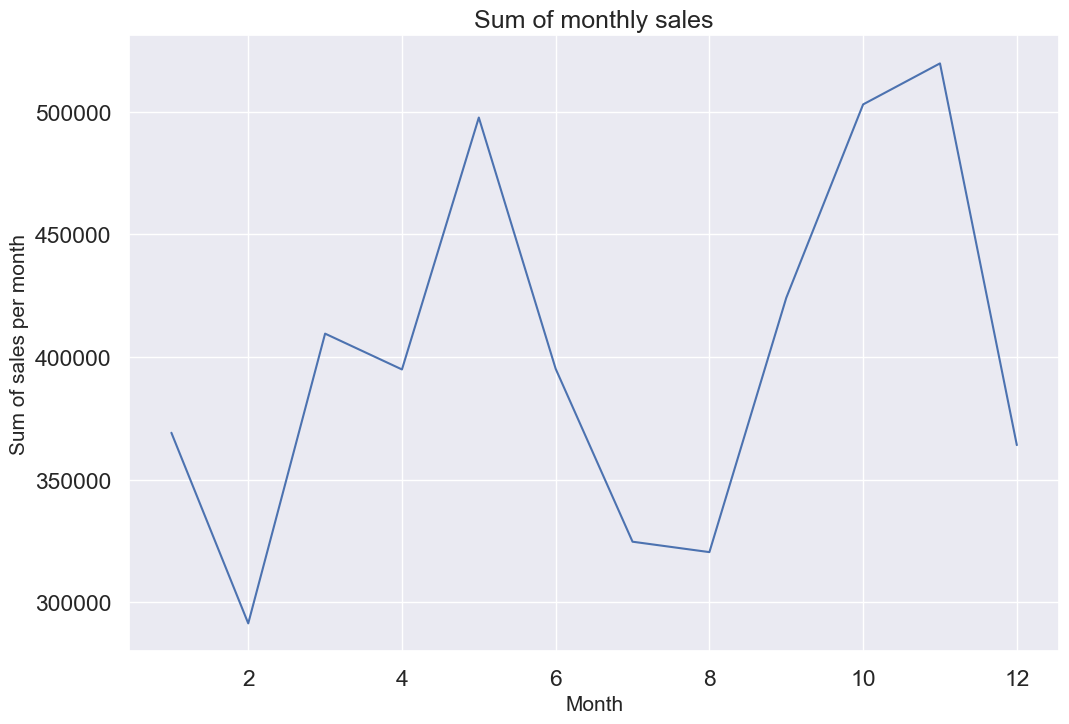

In [31]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.lineplot(data = df_m_GB, x = "month", y = "value")
plt.title("Sum of monthly sales", fontsize = 18)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sum of sales per month", fontsize = 15)
plt.show()

## Group mean

In [32]:
df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2]).drop_duplicates(ignore_index= True) 
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13464,9810,1,2017-12-31 22:16:20,794.44,0
13465,9811,1,2017-12-31 22:24:06,148.60,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [33]:
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13464,9810,1,2017-12-31 22:16:20,794.44,0
13465,9811,1,2017-12-31 22:24:06,148.60,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [34]:
df.groupby("gender").value.mean()

gender
0    363.746160
1    350.691693
Name: value, dtype: float64

### subsetting

In [35]:
df_0 = df.loc[df.gender == 0].copy()
df_0

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
...,...,...,...,...,...
13458,5989,0,2017-12-31 20:09:17,161.79,0
13461,9807,0,2017-12-31 21:24:08,237.35,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [36]:
df_1 = df.loc[df.gender == 1].copy()
df_1

,customer_id,gender,date,value,predicted_gender
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
9,1009,1,2017-01-01 19:27:17,283.00,1
...,...,...,...,...,...
13460,9806,1,2017-12-31 21:08:36,375.40,1
13462,9808,1,2017-12-31 21:39:27,222.76,0
13463,9809,1,2017-12-31 21:39:33,606.40,1
13464,9810,1,2017-12-31 22:16:20,794.44,0


### Unequal variance t-test

In [37]:
from scipy.stats import levene

In [38]:
stat, p = levene(df_0.value, df_1.value)

In [39]:
p
#The small p-value suggests that the populations do not have equal variances - .

0.019897719159223975

In [40]:
from scipy import stats

In [41]:
stats.ttest_ind(df_0.value, df_1.value, equal_var= False)

Ttest_indResult(statistic=1.9572130150594516, pvalue=0.050343092636154115)

## Confusion matrix

In [42]:
df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2]).drop_duplicates(ignore_index= True) 
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13464,9810,1,2017-12-31 22:16:20,794.44,0
13465,9811,1,2017-12-31 22:24:06,148.60,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [43]:
y_true1 = df.predicted_gender
y_pred1 = df.gender

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true1, y_pred1)
print(cm)
accuracy_score(y_true1, y_pred1)

[[3348 1463]
 [3410 5248]]


0.6382062513920855

## Classifier

### Splitting the dataset into the Training set and Test set

In [45]:
df = pd.read_csv("screening_exercise_orders_v201810.csv", parse_dates = [2]).drop_duplicates(ignore_index= True) 
df

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
...,...,...,...,...,...
13464,9810,1,2017-12-31 22:16:20,794.44,0
13465,9811,1,2017-12-31 22:24:06,148.60,0
13466,9812,0,2017-12-31 23:01:10,153.00,1
13467,9813,0,2017-12-31 23:11:02,534.00,1


In [46]:
X = df.iloc[:, 3:].values
X

array([[198.5,   1. ],
       [338. ,   1. ],
       [733. ,   1. ],
       ...,
       [153. ,   1. ],
       [534. ,   1. ],
       [306.6,   1. ]])

In [47]:
y = df.iloc[:, 1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
print(X_train)

[[248.     0.  ]
 [296.2    1.  ]
 [284.8    1.  ]
 ...
 [668.8    1.  ]
 [215.57   0.  ]
 [ 10.89   0.  ]]


In [50]:
print(y_train)

[0 0 1 ... 1 1 0]


In [51]:
print(X_test)

[[3.7584e+02 1.0000e+00]
 [1.4700e+02 0.0000e+00]
 [1.1260e+02 1.0000e+00]
 ...
 [1.5452e+03 1.0000e+00]
 [2.5080e+02 0.0000e+00]
 [1.0000e+01 1.0000e+00]]


In [52]:
print(y_test)

[1 1 0 ... 1 1 1]


## Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler #from library.module import class 
sc = StandardScaler() #make object (sc) using instance (StandardScaler)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
print(X_train)

[[-0.28196924 -1.32545205]
 [-0.15604143  0.75445958]
 [-0.18582519  0.75445958]
 ...
 [ 0.81741709  0.75445958]
 [-0.36669618 -1.32545205]
 [-0.90144522 -1.32545205]]


In [55]:
print(X_test)

[[ 0.05202684  0.75445958]
 [-0.54584286 -1.32545205]
 [-0.63571664  0.75445958]
 ...
 [ 3.10710857  0.75445958]
 [-0.27465393 -1.32545205]
 [-0.90377044  0.75445958]]


## Training the Decision Tree Classification model on the Training set

In [56]:
from sklearn.tree import DecisionTreeClassifier #from library.module import class 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1234) #make object (classifier) using instance (DecisionTreeClassifier)
classifier.fit(X_train, y_train) #call the fit method on the object (classifier) to fit it to the training data

DecisionTreeClassifier(criterion='entropy', random_state=1234)

## Predicting a new result

In [57]:
print(classifier.predict(sc.transform([[100, 0]])))

[0]


## Predicting the Test set results

In [58]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 0]
 ...
 [1 1]
 [0 1]
 [1 1]]


## Making the Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[935 743]
 [708 982]]


0.5691805225653207

- Compared to the predicted gender, our new classifier doesn't seem to work well. 
- To build a better model, we need another feature or another model to fit.   
- We have more bias, but we're still interested in the graphical representation of the trained classifier. 

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


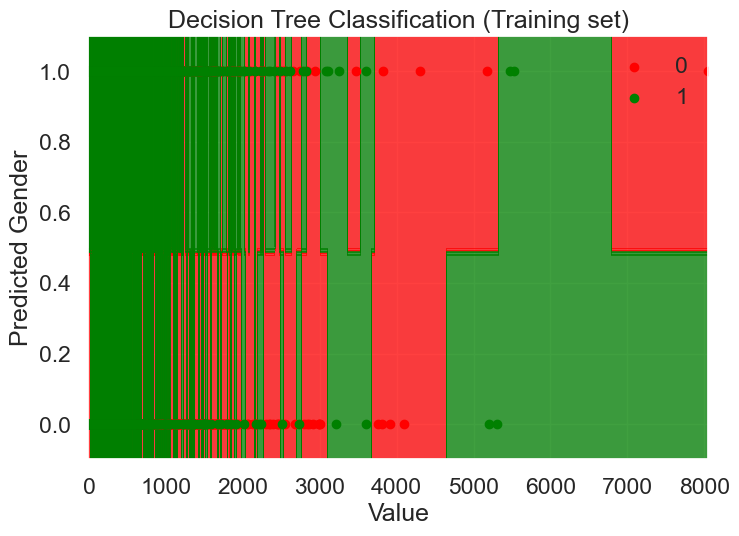

In [60]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 1].max() + 0.1, step = 0.025))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Value')
plt.ylabel('Predicted Gender')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


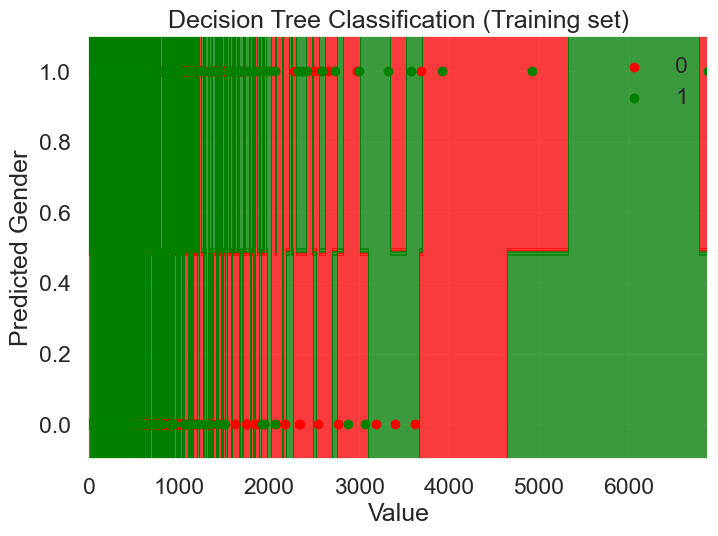

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 1].max() + 0.1, step = 0.025))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Value')
plt.ylabel('Predicted Gender')
plt.legend()
plt.show()